# Tropical Rain Belt

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.lines import Line2D

from netCDF4 import Dataset
import cartopy.crs as ccrs

## Read in Data

In [2]:
# temperature
T_nc = Dataset('../Data/climate/tmp.0-10cm.mon.ltm.nc')

# runoff
R_nc = Dataset('../Data/climate/runof.sfc.mon.ltm.nc')

# precipitation
P_nc = Dataset('../Data/climate/prate.sfc.mon.ltm.nc')

# potential evaporation
E_nc = Dataset('../Data/climate/pevpr.sfc.mon.ltm.nc')

# land mask
ls_nc = Dataset('../Data/climate/lsmask.19294.nc')

# evaporation - precipitation
EP_nc = Dataset('../Data/climate/ERAI.EP.1979-2015_annualmean.nc')

Notes about the data:

* temperature, runoff, precipitation, potential evaporation, and the land mask were all downloaded directly from: https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.surfaceflux.html, and represent long term montly means (1981 - 2010).
* evaporation minus precipitation data were taken from: https://climatedataguide.ucar.edu/climate-data/era-interim-derived-components
    * note that the the raw netCDF file (`ERAI.EP.1979-2015_annualmean.nc`) was too large to be uploaded to GitHub - we therefore calculate the mean (with respect to time) for each pixel and create a new netCDF file that contains only this mean data, and include this smaller netCDF file within this GitHub repository (see code block below)
* in the land mask, -1 is land, and 0 is ocean.
* the evaporation data is **potential evaporation**, not actual evaporation.

## Get Annual Zonal Means

Show the units that we are dealing with:

In [3]:
print('T     = {}'.format(T_nc.variables['tmp'].units))
print('R     = {}'.format(R_nc.variables['runof'].units))
print('P     = {}'.format(P_nc.variables['prate'].units))
print('E     = {}'.format(E_nc.variables['pevpr'].units))
print('E - P = kg/m^2/day')

T     = degK
R     = kg/m^2
P     = Kg/m^2/s
E     = W/m^2
E - P = kg/m^2/day


Get an array which has the mean (with respect for time) for each pixel:

In [4]:
# get the annual mean
T_annual_means_nc = np.nanmean(T_nc.variables['tmp'][:,:,:].data, axis=0)
R_annual_means_nc = np.nanmean(R_nc.variables['runof'][:,:,:].data, axis=0)
P_annual_means_nc = np.nanmean(P_nc.variables['prate'][:,:,:].data, axis=0)
E_annual_means_nc = np.nanmean(E_nc.variables['pevpr'][:,:,:].data, axis=0)

# get rid of fill values
T_annual_means_nc[T_annual_means_nc<-100] = np.nan
R_annual_means_nc[R_annual_means_nc<-100] = np.nan
P_annual_means_nc[P_annual_means_nc<-100] = np.nan
E_annual_means_nc[E_annual_means_nc<-100] = np.nan

# we already calculated the annual mean for the E-P data
EP_annual_means_nc = EP_nc.variables['EP'][:,:].data

Get the zonal means:

In [5]:
T_zonal_means_nc = np.nanmean(T_annual_means_nc, axis=1)
R_zonal_means_nc = np.nanmean(R_annual_means_nc, axis=1)
P_zonal_means_nc = np.nanmean(P_annual_means_nc, axis=1)
E_zonal_means_nc = np.nanmean(E_annual_means_nc, axis=1)
EP_zonal_means_nc = np.nanmean(EP_annual_means_nc, axis=1)

/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


Convert units of temperature data to C:

In [6]:
T_annual_means_nc = T_annual_means_nc - 273.15
T_zonal_means_nc = T_zonal_means_nc - 273.15

Convert units of precipitation data to m/yr:

In [7]:
P_annual_means_nc = P_annual_means_nc * 31536000 * 0.001
P_zonal_means_nc = P_zonal_means_nc * 31536000 * 0.001

Plot:

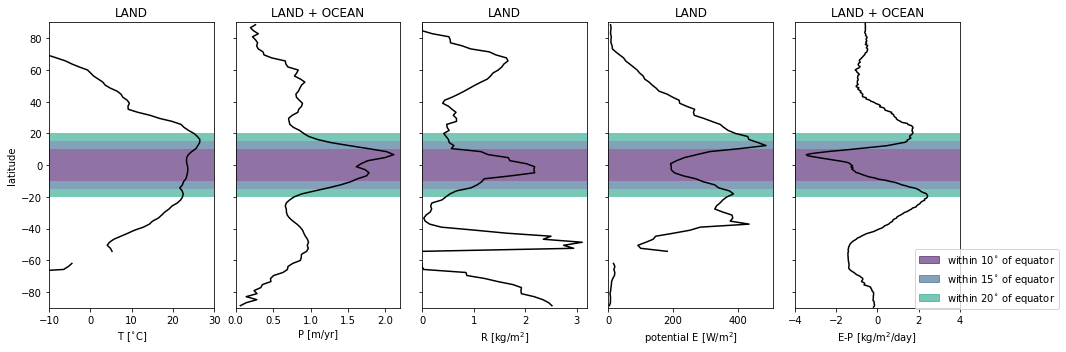

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,5))

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(T_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[0].set_xlabel('T [$^{\circ}$C]')
ax[0].set_ylim([-90, 90])
ax[0].set_xlim([-10,30])
ax[0].set_ylabel('latitude')
ax[0].set_title('LAND')

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(P_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('P [m/yr]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 2.2])
ax[1].set_title('LAND + OCEAN')

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[2].add_patch(degrees_10)
ax[2].add_patch(degrees_15_low)
ax[2].add_patch(degrees_15_high)
ax[2].add_patch(degrees_20_low)
ax[2].add_patch(degrees_20_high)
ax[2].plot(R_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[2].set_xlabel('R [kg/m$^{2}$]')
ax[2].set_ylim([-90, 90])
ax[2].set_xlim([0, 3.2])
ax[2].set_title('LAND')

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[3].add_patch(degrees_10)
ax[3].add_patch(degrees_15_low)
ax[3].add_patch(degrees_15_high)
ax[3].add_patch(degrees_20_low)
ax[3].add_patch(degrees_20_high)
ax[3].plot(E_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[3].set_xlabel('potential E [W/m$^{2}$]')
ax[3].set_ylim([-90, 90])
ax[3].set_xlim([0,510])
ax[3].set_title('LAND')

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[4].add_patch(degrees_10)
ax[4].add_patch(degrees_15_low)
ax[4].add_patch(degrees_15_high)
ax[4].add_patch(degrees_20_low)
ax[4].add_patch(degrees_20_high)
ax[4].plot(EP_zonal_means_nc,EP_nc.variables['lat'],color='black')
ax[4].set_xlabel('E-P [kg/m$^{2}$/day]')
ax[4].set_ylim([-90, 90])
ax[4].set_xlim([-4,4])
ax[4].set_title('LAND + OCEAN')

degrees_10 = patches.Patch(linestyle='-', label='within 10$^{\circ}$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^{\circ}$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^{\circ}$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(0.7, -.02),handles=[degrees_10,degrees_15,degrees_20],loc='lower left')

plt.tight_layout()
plt.show(fig)

## Land Data Only

Note that T, R, and E data is already over land only, except it includes seasonally variable ice sheets:

The resolution of the E-P dataset is different to that of the other data - we therefore resampled the data using GDAL Warp in QGIS, setting the method to be mode. This crudely makes the E-P dataset compatible with the land-sea mask, so we can extract the land data only.

In [9]:
EP_nc_resampled = Dataset('../Data/climate/ERAI.EP.1979-2015_annualmean_resampled.nc')

In [10]:
# storage arrays
Tland_zonal_means_nc = np.array([])
Rland_zonal_means_nc = np.array([])
Pland_zonal_means_nc = np.array([])
Eland_zonal_means_nc = np.array([])
EPland_zonal_means_nc = np.array([])

# iterate over the latitudes
for i in range(len(T_nc.variables['lat'])):
    
    # latitude storage arrays
    year_T = np.array([])
    year_R = np.array([])
    year_P = np.array([])
    year_E = np.array([])
    
    # iterate over the times
    for j in range(len(T_nc.variables['time'])):
        data_T = T_nc.variables['tmp'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_T = data_T[data_T>-100]
        data_R = R_nc.variables['runof'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_R = data_R[data_R>-100]
        data_P = P_nc.variables['prate'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_P = data_P[data_P>-100]
        data_E = E_nc.variables['pevpr'][j,i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        data_E = data_E[data_E>-100]
        
        year_T = np.append(year_T, data_T)
        year_R = np.append(year_R, data_R)
        year_P = np.append(year_P, data_P)
        year_E = np.append(year_E, data_E)
        
    # the E-P data is already time averaged, so just get the data for the latitude of interest
    year_EP = EP_nc_resampled.variables['Band1'][i,:].data[ls_nc.variables['lsmask'][0,i,:].data==-1]
        
    # calculate the mean and store
    Tland_zonal_means_nc = np.append(Tland_zonal_means_nc, np.nanmean(year_T))
    Rland_zonal_means_nc = np.append(Rland_zonal_means_nc, np.nanmean(year_R))
    Pland_zonal_means_nc = np.append(Pland_zonal_means_nc, np.nanmean(year_P))
    Eland_zonal_means_nc = np.append(Eland_zonal_means_nc, np.nanmean(year_E))
    EPland_zonal_means_nc = np.append(EPland_zonal_means_nc, np.nanmean(year_EP))

/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/Users/yuempark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice


Convert units again:

In [11]:
Tland_zonal_means_nc = Tland_zonal_means_nc - 273.15
Pland_zonal_means_nc = Pland_zonal_means_nc * 31536000 * 0.001

Get the resampled zonal means for the E-P data:

In [12]:
EP_zonal_means_nc_resampled = np.nanmean(EP_nc_resampled.variables['Band1'][:,:].data, axis=1)

Plot:

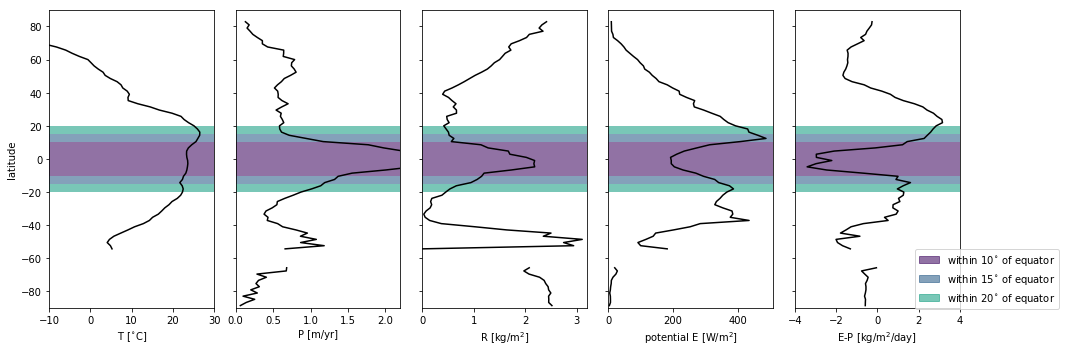

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,5))

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(Tland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[0].set_xlabel('T [$^{\circ}$C]')
ax[0].set_ylim([-90, 90])
ax[0].set_xlim([-10,30])
ax[0].set_ylabel('latitude')

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(Pland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('P [m/yr]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 2.2])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[2].add_patch(degrees_10)
ax[2].add_patch(degrees_15_low)
ax[2].add_patch(degrees_15_high)
ax[2].add_patch(degrees_20_low)
ax[2].add_patch(degrees_20_high)
ax[2].plot(Rland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[2].set_xlabel('R [kg/m$^{2}$]')
ax[2].set_ylim([-90, 90])
ax[2].set_xlim([0, 3.2])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[3].add_patch(degrees_10)
ax[3].add_patch(degrees_15_low)
ax[3].add_patch(degrees_15_high)
ax[3].add_patch(degrees_20_low)
ax[3].add_patch(degrees_20_high)
ax[3].plot(Eland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[3].set_xlabel('potential E [W/m$^{2}$]')
ax[3].set_ylim([-90, 90])
ax[3].set_xlim([0,510])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[4].add_patch(degrees_10)
ax[4].add_patch(degrees_15_low)
ax[4].add_patch(degrees_15_high)
ax[4].add_patch(degrees_20_low)
ax[4].add_patch(degrees_20_high)
ax[4].plot(EPland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[4].set_xlabel('E-P [kg/m$^{2}$/day]')
ax[4].set_ylim([-90, 90])
ax[4].set_xlim([-4,4])

degrees_10 = patches.Patch(linestyle='-', label='within 10$^{\circ}$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^{\circ}$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^{\circ}$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(0.7, -.02),handles=[degrees_10,degrees_15,degrees_20],loc='lower left')

plt.tight_layout()
plt.show(fig)

## Maps

In [14]:
def plot_z(lat, lon, z, coastlines=False, output=False, colormap='viridis'):
    """
    Plot data.

    Parameters
    ----------
    lat : latitude vector
    lon : longitude vector
    z : data array
    coastlines : if True, plot modern coastlines. Default False.
    output : if True, return figure and axis handles
    """
    #wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    fig = plt.figure(figsize=(15,6))

    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree())
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree())
    fig.colorbar(im, ax=ax)

    if output!=False:
        return fig, ax

Temperature (C):

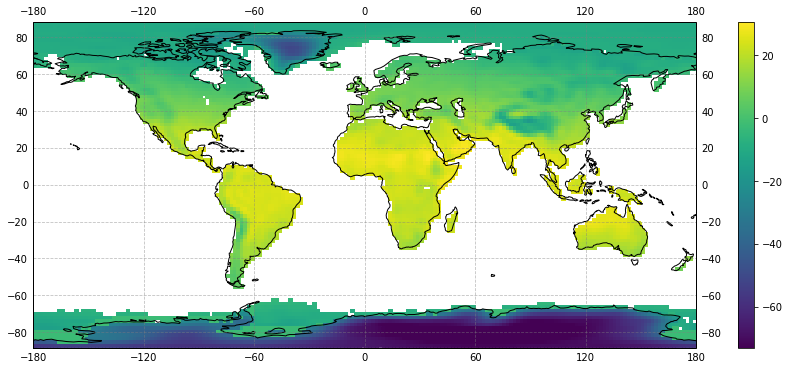

In [15]:
plot_z(T_nc.variables['lat'], T_nc.variables['lon'], T_annual_means_nc, coastlines=True)

Runoff (kg/m$^{2}$)

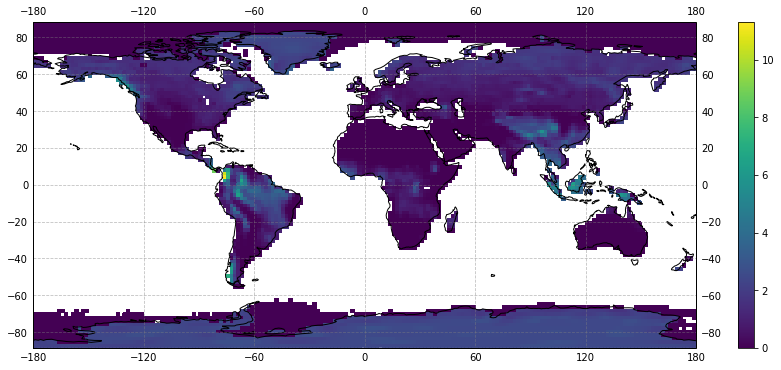

In [16]:
plot_z(T_nc.variables['lat'], T_nc.variables['lon'], R_annual_means_nc, coastlines=True)

Precipitation (m/yr)

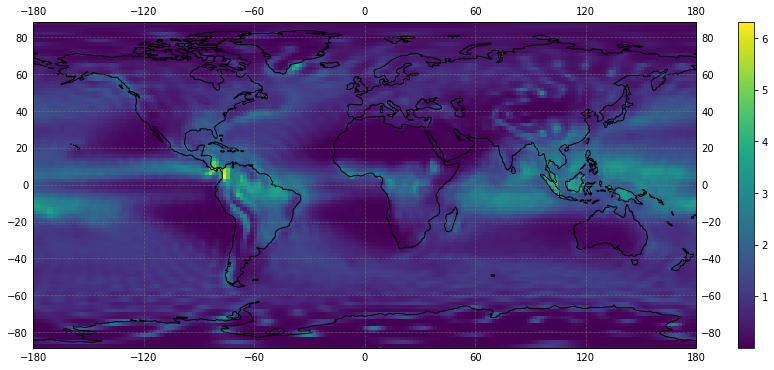

In [17]:
plot_z(T_nc.variables['lat'], T_nc.variables['lon'], P_annual_means_nc, coastlines=True)

Potential evaporation (W/m$^{2}$)

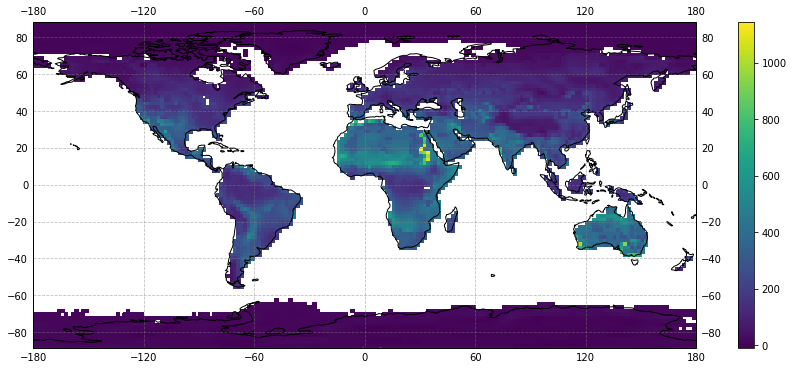

In [18]:
plot_z(T_nc.variables['lat'], T_nc.variables['lon'], E_annual_means_nc, coastlines=True)

Evaporation minus precipitation (kg/m$^{2}$/day)

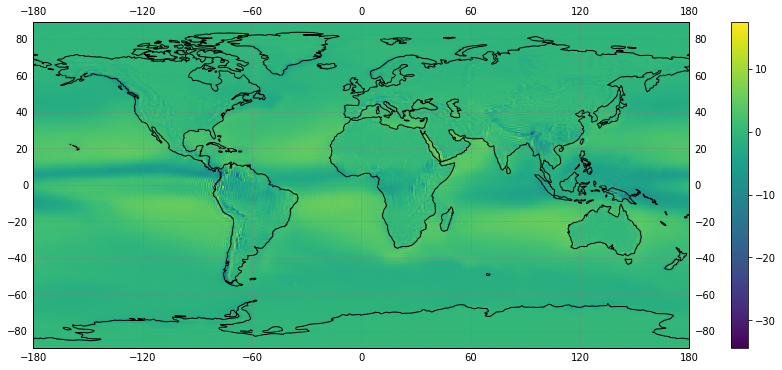

In [19]:
plot_z(EP_nc.variables['lat'], EP_nc.variables['lon'], EP_annual_means_nc, coastlines=True)

## Figure

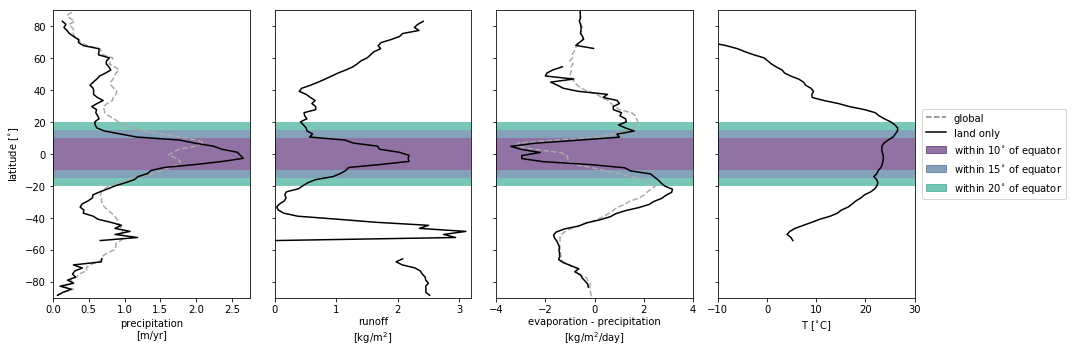

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15,5))

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[0].add_patch(degrees_10)
ax[0].add_patch(degrees_15_low)
ax[0].add_patch(degrees_15_high)
ax[0].add_patch(degrees_20_low)
ax[0].add_patch(degrees_20_high)
ax[0].plot(P_zonal_means_nc,T_nc.variables['lat'],color='darkgrey',ls='--')
ax[0].plot(Pland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[0].set_xlabel('precipitation\n[m/yr]')
ax[0].set_ylim([-90, 90])
ax[0].set_xlim([0, 2.75])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[1].add_patch(degrees_10)
ax[1].add_patch(degrees_15_low)
ax[1].add_patch(degrees_15_high)
ax[1].add_patch(degrees_20_low)
ax[1].add_patch(degrees_20_high)
ax[1].plot(Rland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[1].set_xlabel('runoff\n[kg/m$^{2}$]')
ax[1].set_ylim([-90, 90])
ax[1].set_xlim([0, 3.2])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[2].add_patch(degrees_10)
ax[2].add_patch(degrees_15_low)
ax[2].add_patch(degrees_15_high)
ax[2].add_patch(degrees_20_low)
ax[2].add_patch(degrees_20_high)
ax[2].plot(EP_zonal_means_nc_resampled,EP_nc_resampled.variables['lat'],color='darkgrey', ls='--')
ax[2].plot(EPland_zonal_means_nc,EP_nc_resampled.variables['lat'],color='black')
ax[2].set_xlabel('evaporation - precipitation\n[kg/m$^{2}$/day]')
ax[2].set_ylim([-90, 90])
ax[2].set_xlim([-4,4])

degrees_10 = patches.Rectangle((-10,-10),520,20,edgecolor='none',alpha=0.6,facecolor='#481567')
degrees_15_low = patches.Rectangle((-10,-15),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_15_high = patches.Rectangle((-10,10),520,5,edgecolor='none',alpha=0.6,facecolor='#33638D')
degrees_20_low = patches.Rectangle((-10,-20),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
degrees_20_high = patches.Rectangle((-10,15),520,5,edgecolor='none',alpha=0.6,facecolor='#20A387')
ax[3].add_patch(degrees_10)
ax[3].add_patch(degrees_15_low)
ax[3].add_patch(degrees_15_high)
ax[3].add_patch(degrees_20_low)
ax[3].add_patch(degrees_20_high)
ax[3].plot(Tland_zonal_means_nc,T_nc.variables['lat'],color='black')
ax[3].set_xlabel('T [$^{\circ}$C]')
ax[3].set_ylim([-90, 90])
ax[3].set_xlim([-10,30])

land_line = Line2D([0],[0],c='black',label='land only')
all_line = Line2D([0],[0],c='C7',ls='--',label='global')
degrees_10 = patches.Patch(label='within 10$^{\circ}$ of equator',color='#481567',alpha=0.6)
degrees_15 = patches.Patch(label='within 15$^{\circ}$ of equator',color='#33638D',alpha=0.6)
degrees_20 = patches.Patch(label='within 20$^{\circ}$ of equator',color='#20A387',alpha=0.6)
plt.legend(ncol=1,bbox_to_anchor=(1.01, 0.5),handles=[all_line,land_line,degrees_10,degrees_15,degrees_20],loc='center left')

ax[0].set_ylabel('latitude [$^{\circ}$]')

plt.tight_layout()
#plt.savefig('../Manuscript/Figures/Climatology.pdf', bbox_inches='tight')
plt.show(fig)